# Cat Vs Dog classification problem using CNN.
## An image is given of a cat or a dog and the model made with the help of CNN(Convolution Neural Networks) has to decide which is it.
## Dogs are represented by 1 and cats are reptesented by 0.

### Importing different libraries required. 

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

Using TensorFlow backend.


### Loading the training set of images and test set of images. In both cases, images of cats and dogs are kept in a different folders. The images are in 'jpeg' format. and converted to a shape of (64*64*3)

In [3]:
from keras.preprocessing.image import ImageDataGenerator
traingen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
testgen = ImageDataGenerator(rescale=1./255)
trainData = traingen.flow_from_directory('training_set/training_set',target_size=(64,64),batch_size=32,class_mode='binary')
testData = testgen.flow_from_directory('test_set/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Defining a Sequential model to be used.

In [4]:
from keras.models import Sequential
classifier = Sequential()

### Defining the first layer of the CNN. which conatains a convolution layer, a max-pool layer and a batch normalization layer

In [5]:
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(64,64,3), activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())

### Defining the second layer of the CNN. which conatains a convolution layer, a max-pool layer and a batch normalization layer

In [6]:
classifier.add(Convolution2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())

### Defining the third layer of the CNN. which conatains a convolution layer, a max-pool layer and a batch normalization layer

In [7]:
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())

### Defining a fourth layers which converts the output of third layer to a single vector nodes.

In [8]:
classifier.add(Flatten())

### Defining a sixth layer which contains a fully connected layer with 32 units with previous layer.

In [9]:
classifier.add(Dense(units=32, activation='relu'))

### Defining the output layer which conatins fully connected layer with just 1 unit in its output for classification into two classes and an activation function of 'sigmoid'.

In [10]:
classifier.add(Dense(units=1, activation='sigmoid'))

### The overview of model.

In [11]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)       

### The model is compiled using 'adam' optimizer and 'binary loss' as its loss function.
### The model is fitted with training images in 10 epochs and the test images are used as validation set to cross check the output.

In [14]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = classifier.fit_generator(trainData,
                                   steps_per_epoch = 8005,
                                   epochs=5,
                                   validation_data=testData,
                                   validation_steps=2000,
                                   verbose=1)

Epoch 1/5
8005/8005 [==============================] - 3009s 376ms/step - loss: 0.2671 - accuracy: 0.8836 - val_loss: 0.5906 - val_accuracy: 0.8067
Epoch 2/5
8005/8005 [==============================] - 2667s 333ms/step - loss: 0.1133 - accuracy: 0.9556 - val_loss: 0.5446 - val_accuracy: 0.8273
Epoch 3/5
8005/8005 [==============================] - 2514s 314ms/step - loss: 0.0728 - accuracy: 0.9723 - val_loss: 0.6989 - val_accuracy: 0.8111
Epoch 4/5
8005/8005 [==============================] - 2515s 314ms/step - loss: 0.0561 - accuracy: 0.9791 - val_loss: 0.4544 - val_accuracy: 0.8277
Epoch 5/5
8005/8005 [==============================] - 2531s 316ms/step - loss: 0.0466 - accuracy: 0.9832 - val_loss: 0.1394 - val_accuracy: 0.8277


### The training acuuracy came out to be 98.32% and test accuracy came out to be 82.77%. Thus implying a slight overfitting and high variance in the model.

### The distribution of training loss and accuracy with respect to number of epochs. 

<Figure size 432x288 with 0 Axes>

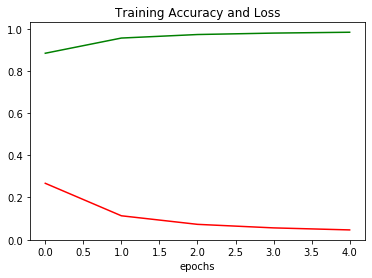

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'],'green',label='accuracy')
plt.plot(history.history['loss'],'red',label='loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('epochs')
plt.figure()

### The distribution of validation loss and accuracy with repect to number of epochs.

<Figure size 432x288 with 0 Axes>

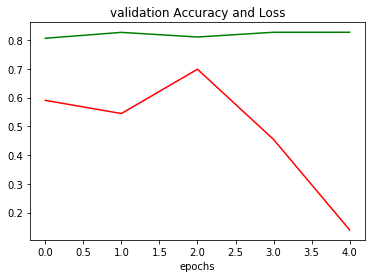

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['val_accuracy'],'green',label='val_accuracy')
plt.plot(history.history['val_loss'],'red',label='val_loss')
plt.title('validation Accuracy and Loss')
plt.xlabel('epochs')
plt.figure()

### Example of a training image.

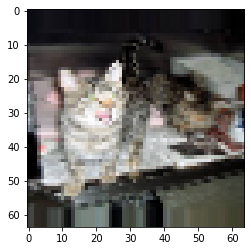

In [17]:
plt.imshow(trainData[0][0][0])

### Prediction of a test image using the defined model.

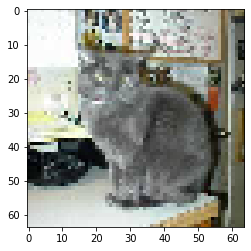

In [18]:
plt.imshow(testData[1][0][1])

In [19]:
img = testData[1][0][1].reshape(1,64,64,3)

In [21]:
pred = classifier.predict(img)
print("probablility of the image being cat : ", '%.2f'%(1-pred) )

probablility of the image being cat :  1.00


### A corresponding test set image of a dog. 

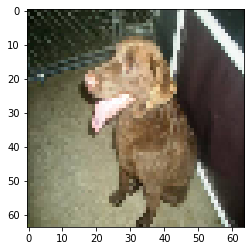

In [34]:
plt.imshow(testData[6][0][1])

In [35]:
img = testData[6][0][1].reshape(1,64,64,3)

In [37]:
pred = classifier.predict(img)
print("probablility of the image being dog : ", '%.2f'%(pred) )

probablility of the image being dog :  1.00
